In [31]:
import pandas as pd
import math,copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("CSV_files/full_data.csv")

In [4]:
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [5]:
y_in = df['CKHL'].fillna(0)
# y_in=y_in/1000
x_in = df['CPOR'].fillna(0)

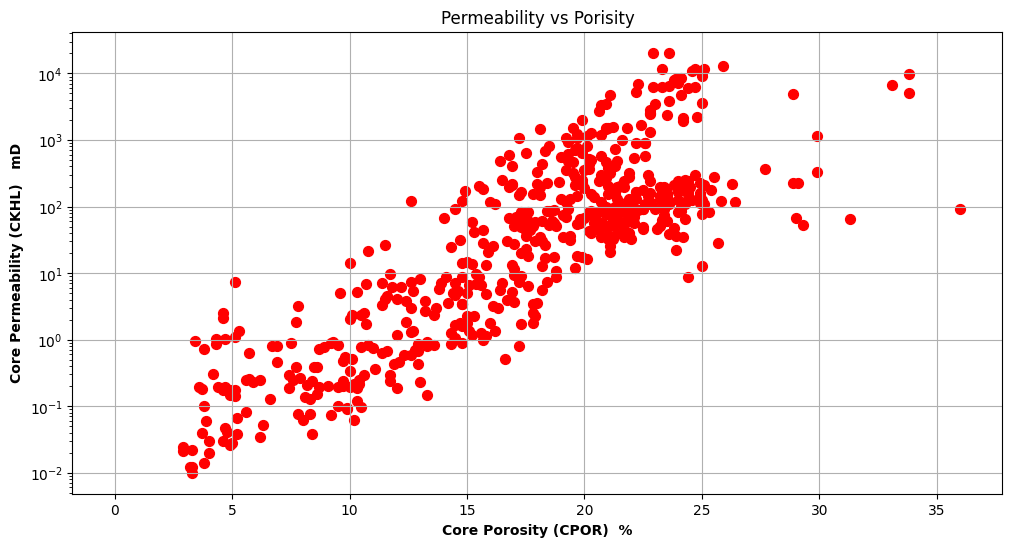

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(x=x_in, y=y_in, c='r',s=50)
plt.yscale("log")

plt.title("Permeability vs Porisity")
plt.ylabel('Core Permeability (CKHL)   mD' , fontweight='bold')
plt.xlabel('Core Porosity (CPOR)  %', fontweight='bold')

plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [48]:
xs=x_in.shape[0]
ys=y_in.shape[0]
print(xs)
print(ys)

x_t=[]
y_t=[]

for i in range (xs):
    if(x_in[i]>0 and y_in[i]>0):
        # print(f"{i} . hell0")
        x_t.append(x_in[i])
        y_t.append(y_in[i]/1000)
        
x_train=np.array(x_t)
y_train=np.array(y_t)

print(x_in[0],x_in[1],x_in[2])

print(x_train)
print(y_train)
print(x_train.shape[0])
# print(y_train.shape[0])

728
728
17.0 14.8 10.8
[17.  10.8 12.8 16.4 16.5 17.2 16.9 20.1 10.3 12.7 19.   9.9 20.6 21.
 22.7 21.9 20.  22.1 17.7 11.6 19.6 24.4 25.8 26.4 24.9 25.1 25.  24.3
 23.5 36.  24.  25.  24.9 23.6 22.6 18.3  8.7 15.  16.9 24.  24.4 24.1
 24.9 24.6 22.5 22.  29.3 23.8 23.2 23.1 23.6 23.9 22.5 22.  21.9 25.1
 17.6 16.1  9.2  4.   3.8  3.3 19.7 21.1  8.6  3.2  3.3  8.5 18.3 21.
 18.2 23.4 29.1 22.1 21.  15.8 18.7 14.7 20.3 19.1 19.9 23.6 22.9 23.5
 33.8 25.  24.4 33.1 24.1 24.8 22.9 21.1 18.1 22.2 22.3 23.3 25.  33.8
 23.8 24.1 24.  23.9 23.9 25.  25.1 24.6 24.7 25.9 23.3 24.7 23.6 23.
 23.6 22.8 22.4 22.8 20.9 21.4 20.  15.2 12.7  8.2  7.4  4.  25.3 29.9
 28.9 25.4 24.3 21.8 12.  14.1 12.4  8.6  9.7 21.7 23.6 21.2 21.2 21.5
 21.1 29.  21.9 21.9 21.9 18.7 17.  17.3 17.1 21.4 19.3 19.2 18.2 20.7
 21.4 21.1 21.  21.3 18.8 20.7 21.7 21.5 21.3 21.4 21.2 20.9 20.7 22.2
 20.6 22.5 21.9 21.4 23.2 22.8 20.2 15.1 18.8 14.4 20.9 16.8 22.2 21.4
 21.2 15.3 16.2 21.8 13.3 18.8 15.  23.3 23.4 31.3 23.4 2

In [40]:
def compute_cost(x,y,w,b):

    m = x.shape[0]
    # print(" IAM X SHAPE")
    cost = 0

    for i in range (m):
        f_wb = w*x[i]+b
        # print(f"i am f_wb: {f_wb}")
        cost = cost+ (f_wb - y[i])**2
    cost_sum = 1/(2*m) *cost
    return cost_sum
    

In [42]:
def compute_grad(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range (m):
        f_wb = w*x[i]+b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db
        

In [43]:
def grad_des(x,y,w,b,alpha,num_iters,cost_func,grad_func):
    j_history=[] 
    p_history=[] 
    
    for i in range(num_iters):
        dj_dw,dj_db = grad_func(x,y,w,b)
        b = b - alpha*dj_db
        w = w - alpha*dj_dw

        if i<10000:
            j_history.append(cost_func(x,y,w,b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w,b,j_history,p_history

In [66]:

w = 0
b = 0

iterations = 10000
alpha = 0.003

w_final, b_final, J_hist, p_hist = grad_des(x_train,y_train,w,b,alpha, 
                                                    iterations, compute_cost, compute_grad)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.10e+00  dj_dw: -1.498e+01, dj_db: -6.280e-01   w:  4.494e-02, b: 1.88392e-03
Iteration 1000: Cost 2.06e+00  dj_dw: -4.878e-03, dj_db:  9.555e-02   w:  6.175e-02, b:-3.42472e-01
Iteration 2000: Cost 2.04e+00  dj_dw: -3.416e-03, dj_db:  6.691e-02   w:  7.406e-02, b:-5.83583e-01
Iteration 3000: Cost 2.03e+00  dj_dw: -2.392e-03, dj_db:  4.686e-02   w:  8.268e-02, b:-7.52424e-01
Iteration 4000: Cost 2.03e+00  dj_dw: -1.675e-03, dj_db:  3.281e-02   w:  8.871e-02, b:-8.70657e-01
Iteration 5000: Cost 2.02e+00  dj_dw: -1.173e-03, dj_db:  2.298e-02   w:  9.294e-02, b:-9.53451e-01
Iteration 6000: Cost 2.02e+00  dj_dw: -8.214e-04, dj_db:  1.609e-02   w:  9.590e-02, b:-1.01143e+00
Iteration 7000: Cost 2.02e+00  dj_dw: -5.752e-04, dj_db:  1.127e-02   w:  9.797e-02, b:-1.05203e+00
Iteration 8000: Cost 2.02e+00  dj_dw: -4.028e-04, dj_db:  7.890e-03   w:  9.942e-02, b:-1.08046e+00
Iteration 9000: Cost 2.02e+00  dj_dw: -2.821e-04, dj_db:  5.525e-03   w:  1.004e-01, b:-1.10037e+00


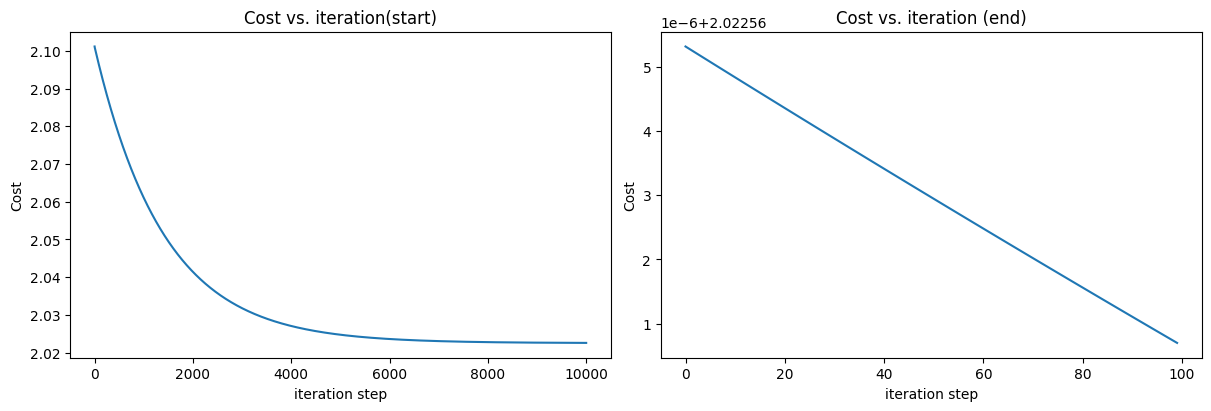

In [67]:
fig,(ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10000])
ax1.set_title("Cost vs. iteration(start)");
ax1.set_ylabel('Cost')  
ax1.set_xlabel('iteration step')

# print(np.arange(len(J_hist[1000:])))
      
ax2.plot(J_hist[9900:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step')
plt.show()

In [68]:
def predict(phi):
    perm = w_final*(phi) + b_final
    perm = 10**perm
    return perm
    

In [69]:
phi=np.arange(0,50)
x_axis=np.array(phi)
print(x_axis)

perm = []
perm.append(predict(phi))
y_axis=np.array(perm)
t = y_axis.shape[1]
print(y_axis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[[7.68604816e-02 9.70186771e-02 1.22463762e-01 1.54582328e-01
  1.95124629e-01 2.46299958e-01 3.10897038e-01 3.92435992e-01
  4.95360164e-01 6.25278255e-01 7.89269959e-01 9.96271760e-01
  1.25756392e+00 1.58738516e+00 2.00370860e+00 2.52922117e+00
  3.19255991e+00 4.02987248e+00 5.08678697e+00 6.42089840e+00
  8.10490717e+00 1.02305809e+01 1.29137549e+01 1.63006449e+01
  2.05758144e+01 2.59722324e+01 3.27839688e+01 4.13822190e+01
  5.22355320e+01 6.59353429e+01 8.32282028e+01 1.05056460e+02
  1.32609614e+02 1.67389132e+02 2.11290274e+02 2.66705365e+02
  3.36654171e+02 4.24948447e+02 5.36399660e+02 6.77081178e+02
  8.54659232e+02 1.07881068e+03 1.36175031e+03 1.71889651e+03
  2.16971143e+03 2.73876156e+03 3.45705645e+03 4.36373851e+03
  5.50821604e+03 6.95285565e+03]]


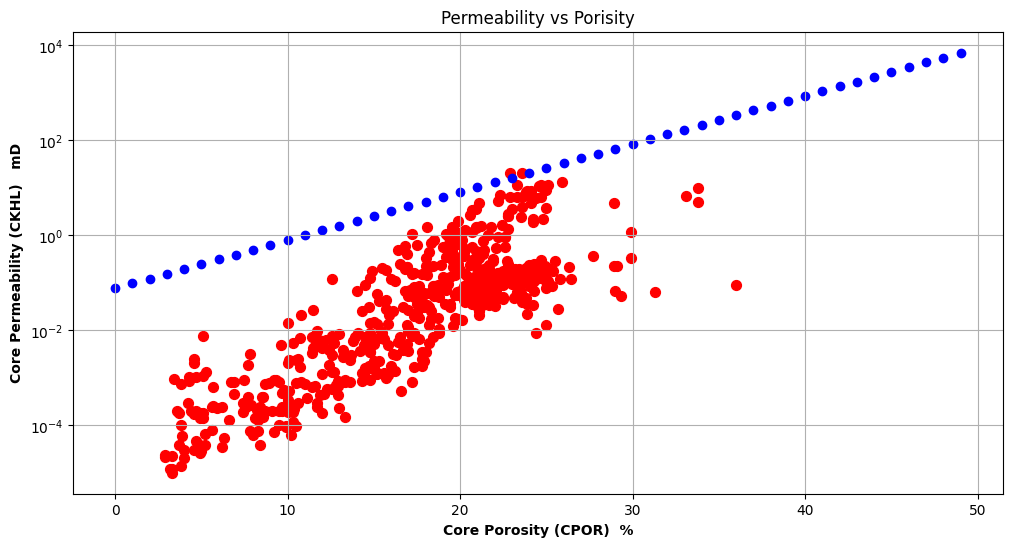

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train,c='r',s=50)
plt.yscale("log")

plt.title("Permeability vs Porisity")
plt.ylabel('Core Permeability (CKHL)   mD' , fontweight='bold')
plt.xlabel('Core Porosity (CPOR)  %', fontweight='bold')

plt.scatter(x_axis,y_axis,c='b')

plt.grid()
plt.show()